In [8]:
import numpy as np
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
--pylab

NameError: name 'pylab' is not defined

In [9]:
data = pd.read_table('Fsatellites.tsv', encoding = "ISO-8859-1")
print(data.shape)

for col in data.columns:
    if 'Unnamed' in col:
        del data[col]
        
for col in data.columns:
    if 'Source' in col:
        del data[col]
data.head()
#data = data.fillna(data.min())


(1381, 254)


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Power (watts),Date of Launch,Expected Lifetime,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,...,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"16,000",2/6/2014,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond..."
2,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,...,"9,000",8/19/1997,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,3/2/2015,15 yrs.,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,...,"7,400",3/13/2004,12 yrs.,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.


In [10]:
data.columns.values

array(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'], dtype=object)

In [108]:
data.columns=['name', 'country_reg', 'country', 'owner', 'users',
              'purpose', 'description', 'CLO', 'TOO', 'longitude',
              'perigee', 'apogee', 'eccentricity', 'inclination', 
              'period', 'launch_mass', 'dry_mass', 'power',
              'launch_date', 'expected_lifetime', 'contractor', 
              'contractor_country', 'launch_site', 'launch_vehicle',
              'COSPAR', 'NORAD', 'comments']
#int(data['power'].replace(',', ''))
#data['power'].replace(',', '').convert_objects(convert_numeric=True,)
#data['power']


/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

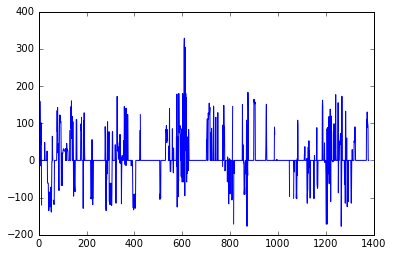

In [63]:
plt.plot(data['longitude'])



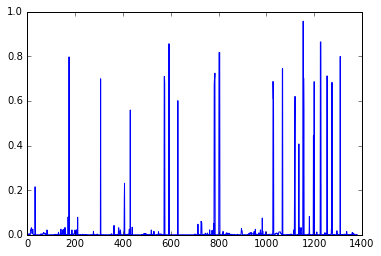

In [71]:
plt.plot(data['eccentricity'])



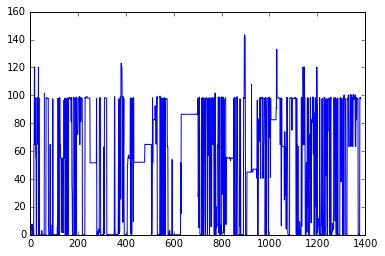

In [103]:
#plt.plot(data['power'])
plt.plot(data['inclination'])


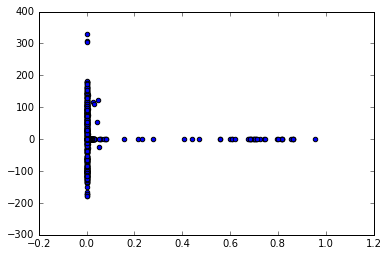

In [69]:
plt.scatter(data['eccentricity'], data['longitude'])



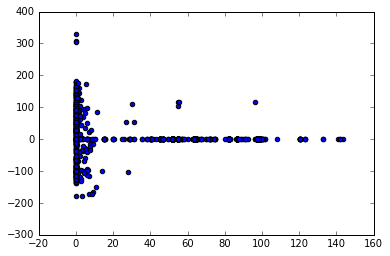

In [67]:
plt.scatter(data['inclination'], data['longitude'])

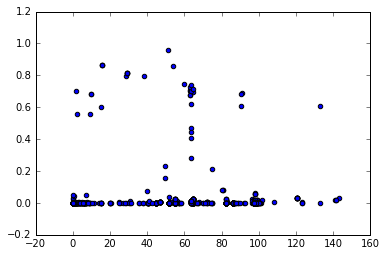

In [106]:
plt.scatter(data['inclination'], data['eccentricity'])

In [13]:
data.to_csv('CSatellites.csv')

In [102]:
pd.unique(data['CLO'])

array(['LEO', 'GEO', 'MEO', 'Elliptical', 'LEO '], dtype=object)

In [101]:
data['CLO'].value_counts()

LEO           758
GEO           493
MEO            92
Elliptical     37
LEO             1
Name: CLO, dtype: int64

In [15]:
pd.unique(data['TOO'])

array(['Non-Polar Inclined', nan, 'Equatorial', 'Polar', 'Sun-Synchronous',
       'Elliptical', 'Deep Highly Eccentric', 'Molniya', 'Cislunar'], dtype=object)

In [18]:
data['TOO'].value_counts()

Sun-Synchronous          345
Non-Polar Inclined       310
Polar                    156
Equatorial                28
Molniya                   15
Elliptical                11
Deep Highly Eccentric      9
Cislunar                   1
Name: TOO, dtype: int64

In [20]:
pd.unique(data['longitude'])
data['longitude'].value_counts()


 0.00      897
 55.00       5
 28.20       4
 83.00       3
 50.00       3
 95.00       3
-114.90      3
 25.00       3
 118.00      3
 140.00      3
-61.00       3
 91.50       2
 90.00       2
 47.50       2
-67.60       2
 48.00       2
 98.00       2
 26.00       2
-61.50       2
-58.00       2
 180.00      2
 60.00       2
-116.80      2
 70.00       2
 25.50       2
 85.00       2
 74.00       2
 75.00       2
 105.50      2
 164.00      2
          ... 
 103.28      1
 105.00      1
 155.07      1
-124.50      1
 87.50       1
 162.03      1
-171.35      1
-96.00       1
 19.24       1
-27.95       1
-0.72        1
-29.95       1
-14.99       1
-55.49       1
 13.97       1
-177.12      1
 142.49      1
 143.77      1
 74.07       1
 28.16       1
-85.16       1
 77.08       1
 31.55       1
 145.06      1
 150.97      1
-89.98       1
-91.10       1
 83.08       1
 82.00       1
-102.80      1
Name: longitude, dtype: int64

In [52]:
pd.unique(data['inclination'])
data['inclination'].value_counts(sort=False)


0.00     32
1.83      1
2.34      1
3.20      1
4.20      1
5.89      1
0.50      1
7.72      1
8.97      1
9.39      1
10.60     1
11.53     1
14.98     5
15.20     1
2.00      1
20.00     4
25.60     1
27.10     1
3.00      1
29.00     3
30.97     1
31.00     1
35.40     2
4.50      1
38.00     2
40.50     3
41.22     1
42.80     1
45.00    24
1.00      1
         ..
97.81     2
55.08     1
0.12      8
97.44     1
54.68     1
98.05     2
98.17     1
4.96      1
55.23     1
7.03      1
0.20      2
74.10     1
0.08     15
97.99    23
0.29      1
98.55     1
98.04     3
6.06      1
3.23      1
97.46    16
54.80     2
0.04     37
0.35      1
97.60     5
1.64      1
55.78     1
97.42     3
98.18     1
82.44     2
98.07     1
Name: inclination, dtype: int64